In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import datetime

In [110]:
df = pd.read_json('baseDeDadosHackathonTCE.json').T.reset_index(drop=True)

In [111]:
df.keys()

Index(['exercicio', 'unidadeOrcamentaria', 'nEmpenho', 'beneficiario',
       'periodo', 'destino', 'motivo', 'valorTotalDiario', 'situacaoEmpenho'],
      dtype='object')

In [112]:
df = df[df['situacaoEmpenho'] == 'Pago']

In [113]:
df_values = df['valorTotalDiario']

In [114]:
def stf(value):
    value = value.replace('.','').replace(',','.')
    return float(value)

In [115]:
df_values.apply(stf)

0        352.36
1       1920.00
3       2116.03
4       2331.90
5       2114.16
         ...   
8237     840.00
8238     700.00
8239    1440.00
8240    1440.00
8241    1650.00
Name: valorTotalDiario, Length: 7814, dtype: float64

In [116]:
def calc_per(date):
    date1, date2 = date.split('a')
    date1 = datetime.datetime.strptime(date1.strip(), '%d/%m/%Y')
    date2 = datetime.datetime.strptime(date2.strip(), '%d/%m/%Y')
    duration = date2 - date1
    return duration.days
    

In [117]:
df['periodo'] = df['periodo'].apply(calc_per)

In [118]:
df2 = df

In [119]:
df2['exercicio'] = df['exercicio'].apply(int)
df2['nEmpenho']  = df['nEmpenho'].apply(int)
df2['valorTotalDiario']   = df['valorTotalDiario'].apply(stf)

In [120]:
df2['unidadeOrcamentaria'] = pd.get_dummies(df['unidadeOrcamentaria'])
df2['beneficiario']        = pd.get_dummies(df['beneficiario'])
df2['destino']             = pd.get_dummies(df['destino'])

In [121]:
df['unidadeOrcamentaria']

0       0
1       0
3       0
4       0
5       0
       ..
8237    0
8238    0
8239    0
8240    0
8241    0
Name: unidadeOrcamentaria, Length: 7814, dtype: uint8

In [86]:
df_brasilia = df[df['destino'] == 'BRASILIA-DF']['valorTotalDiario']

In [87]:
df_brasilia = df_brasilia.apply(stf)

In [88]:
df_brasilia.head()

1     1920.0
15    1100.0
22    1750.0
24    1800.0
26    1920.0
Name: valorTotalDiario, dtype: float64

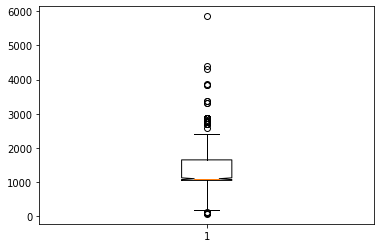

In [89]:
plt.boxplot(df_brasilia, notch=True)
plt.show()

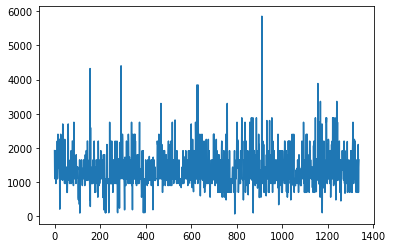

In [90]:
plt.plot(range(len(df_brasilia)), df_brasilia)

In [91]:
df_brasilia_fraud = df[df['destino'] == 'BRASILIA-DF']
df_brasilia_fraud = df_brasilia_fraud[df_brasilia_fraud['valorTotalDiario'].apply(stf) >= 2*np.mean(df_brasilia_fraud['valorTotalDiario'].apply(stf))]

In [92]:
df_brasilia_fraud.head()

,exercicio,unidadeOrcamentaria,nEmpenho,beneficiario,periodo,destino,motivo,valorTotalDiario,situacaoEmpenho
185,2014,26.101-SECRETARIA MUNICIPAL DE DESENVOLVIMENTO...,0423,MARIA AZENILDA VIEIRA DE ARAUJO,5,BRASILIA-DF,PARTICIPAR DA III CONFERENCIA NACIONAL DE ECO...,"2.700,00",Pago
388,2014,32.101-SECRETARIA MUNICIPAL DE CULTURA DE FORT...,0496,MARIA HERBENIA GURGEL COSTA,5,BRASILIA-DF,PARA PARTICIPAR DO XIV WORKSHOP DO SISTEMA CFB...,"2.700,00",Pago
517,2014,30.101-SECRETARIA MUNICIPAL DE TURISMO DE FORT...,0282,REINALDO RIGAUD SALMITO,4,BRASILIA-DF,PARTICIPAR DO CURSO DE GESTAO DE PROJETOS NA ...,"2.750,00",Pago
1133,2014,23.101-SECRETARIA MUNICIPAL DE FINANCAS,0118,MARIA CHRISTINA MACHADO PUBLIO,9,BRASILIA-DF,PAGAMENTO DE ONZE DIARIS AFIM DE PARTICIPAR DE...,"4.320,00",Pago
1447,2015,"31.101-SECRETARIA MUNICIPAL DO TRABALHO, DESEN...",0859,CLAUDIO RICARDO GOMES DE LIMA,4,BRASILIA-DF,DIARIAS COM OBJETIVO DE PARTICIPAR DA CONFEREN...,"2.750,00",Pago


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
lm = LinearRegression()

In [124]:
df.keys()

Index(['exercicio', 'unidadeOrcamentaria', 'nEmpenho', 'beneficiario',
       'periodo', 'destino', 'motivo', 'valorTotalDiario', 'situacaoEmpenho'],
      dtype='object')

In [125]:
y = df2['valorTotalDiario']
X = df2[['exercicio', 'unidadeOrcamentaria', 'nEmpenho', 'beneficiario', 'periodo', 'destino']]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [127]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
lm.coef_

array([ 2.18619651e+01,  2.26779335e+02,  1.17083043e-02, -3.39067375e+02,
        1.89257292e+02, -4.05990675e+02])

In [129]:
predictions = lm.predict(X_test)

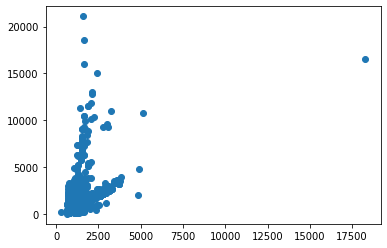

In [130]:
plt.scatter(x=predictions, y=y_test)